In [10]:
path = 'netflix_titles.csv'

In [23]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
df.shape

(8807, 12)

In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

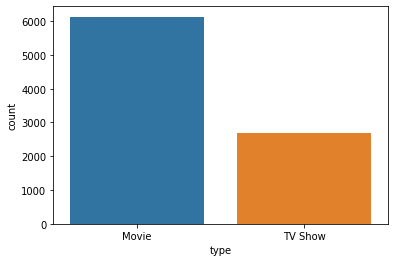

In [24]:
# no. of TV shows vs no. of movies
sns.countplot(x='type', data=df)

         type  duration
1     TV Show         2
2     TV Show         1
3     TV Show         1
4     TV Show         2
5     TV Show         1
...       ...       ...
8795  TV Show         2
8796  TV Show         2
8797  TV Show         3
8800  TV Show         1
8803  TV Show         2

[2676 rows x 2 columns]


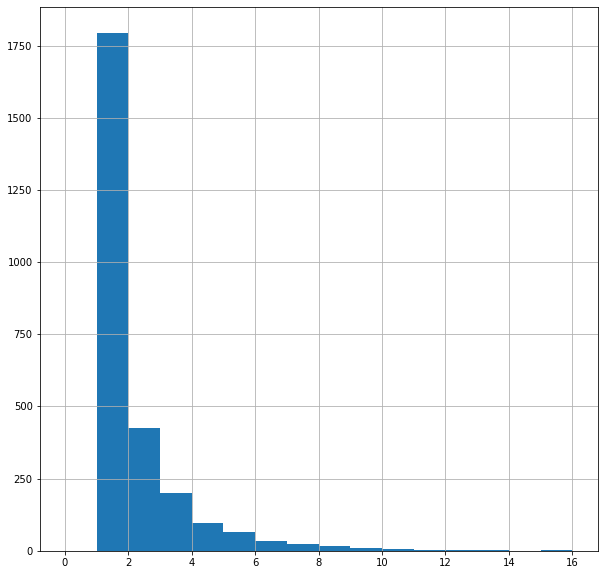

In [47]:
# Histogram of durations of tv shows

dur = df[df['type']=='TV Show'].dropna(subset=['duration'])
dur = dur[['type','duration']]

dur['duration'] = dur['duration'].str.replace('Season',' ')
dur['duration'] = dur['duration'].str.replace('s',' ')
dur['duration'] = dur['duration'].str.strip()

dur['duration'] = dur['duration'].astype('int')

print(dur)

%matplotlib inline

dur['duration'].hist(figsize=(10,10), bins=[i for i in range(17)])

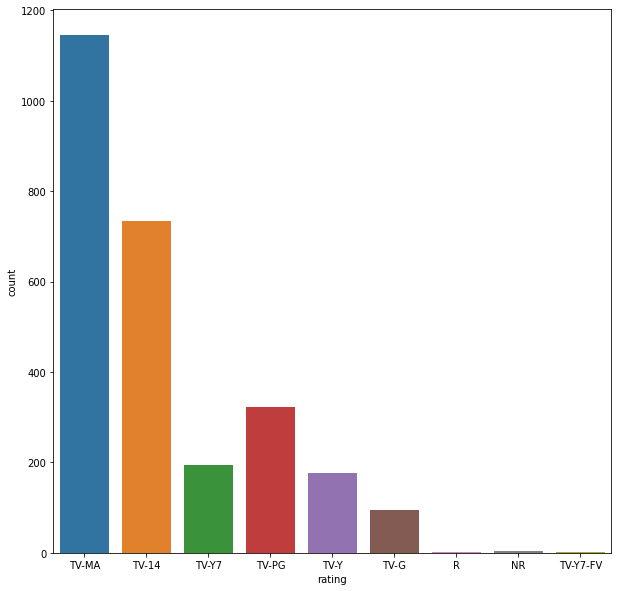

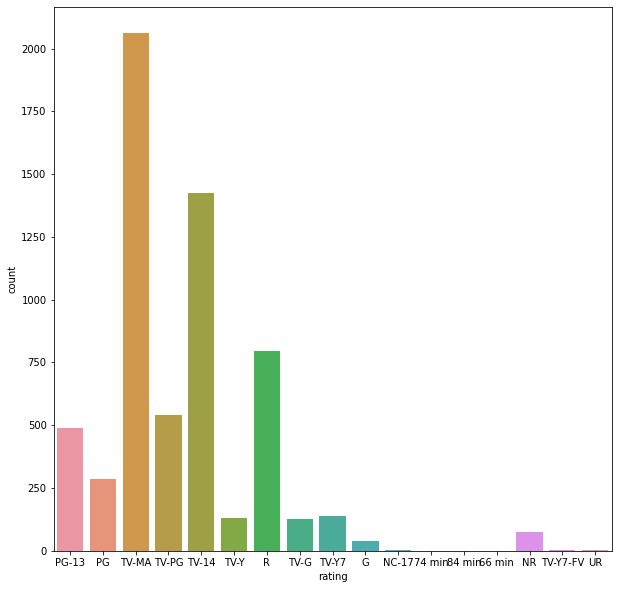

In [57]:
plt.figure(figsize=(10,10))
tv = df[df['type']=='TV Show']
sns.countplot(x='rating',data=tv)

plt.figure(figsize=(10,10))
mov = df[df['type']=='Movie']
sns.countplot(x='rating',data=mov)

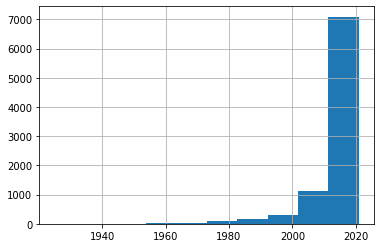

In [61]:
df['release_year'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


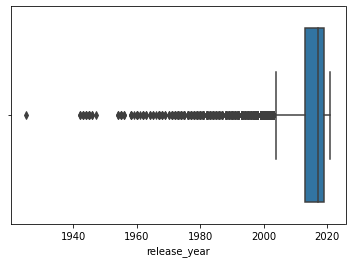

In [63]:
sns.boxplot(df['release_year'])

In [80]:
#months and amount of content added for that month

date = df[['date_added']].dropna()

date['year'] = date['date_added'].apply(lambda x : x.split(', ')[-1])
date['month'] = date['date_added'].apply(lambda x : x.split(' ')[0])

date = date[['year','month']]

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']


li = date.groupby('year')['month'].value_counts()
li = li.unstack().fillna(0)[months].T

print(li)

year       2008  2009  2010  2011  2012  2013  2014  2015  2016   2017   2018  \
month                                                                           
January     1.0   0.0   0.0   0.0   0.0   0.0   2.0   1.0  41.0   72.0  123.0   
February    1.0   0.0   0.0   0.0   1.0   0.0   2.0   3.0  15.0   81.0   86.0   
March       0.0   0.0   0.0   0.0   0.0   1.0   0.0   4.0  16.0  123.0  170.0   
April       0.0   0.0   0.0   0.0   0.0   0.0   2.0   5.0  21.0   91.0  114.0   
May         0.0   1.0   0.0   1.0   0.0   0.0   0.0   5.0  11.0   85.0   95.0   
June        0.0   0.0   0.0   0.0   0.0   0.0   1.0   5.0  18.0   92.0   77.0   
July        0.0   0.0   0.0   0.0   0.0   0.0   1.0   7.0  28.0   75.0  150.0   
August      0.0   0.0   0.0   0.0   0.0   1.0   1.0   2.0  34.0  110.0  163.0   
September   0.0   0.0   0.0   1.0   0.0   2.0   1.0   6.0  46.0  113.0  123.0   
October     0.0   0.0   0.0  11.0   0.0   2.0   4.0  14.0  51.0  125.0  190.0   
November    0.0   1.0   1.0 

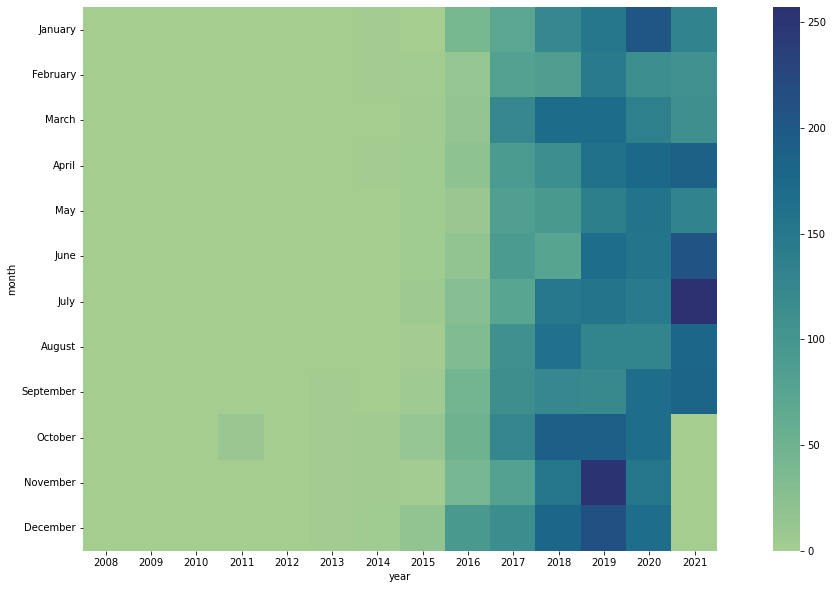

In [95]:
plt.figure(figsize=(20,10))
sns.heatmap(li,cmap='crest',square=True)

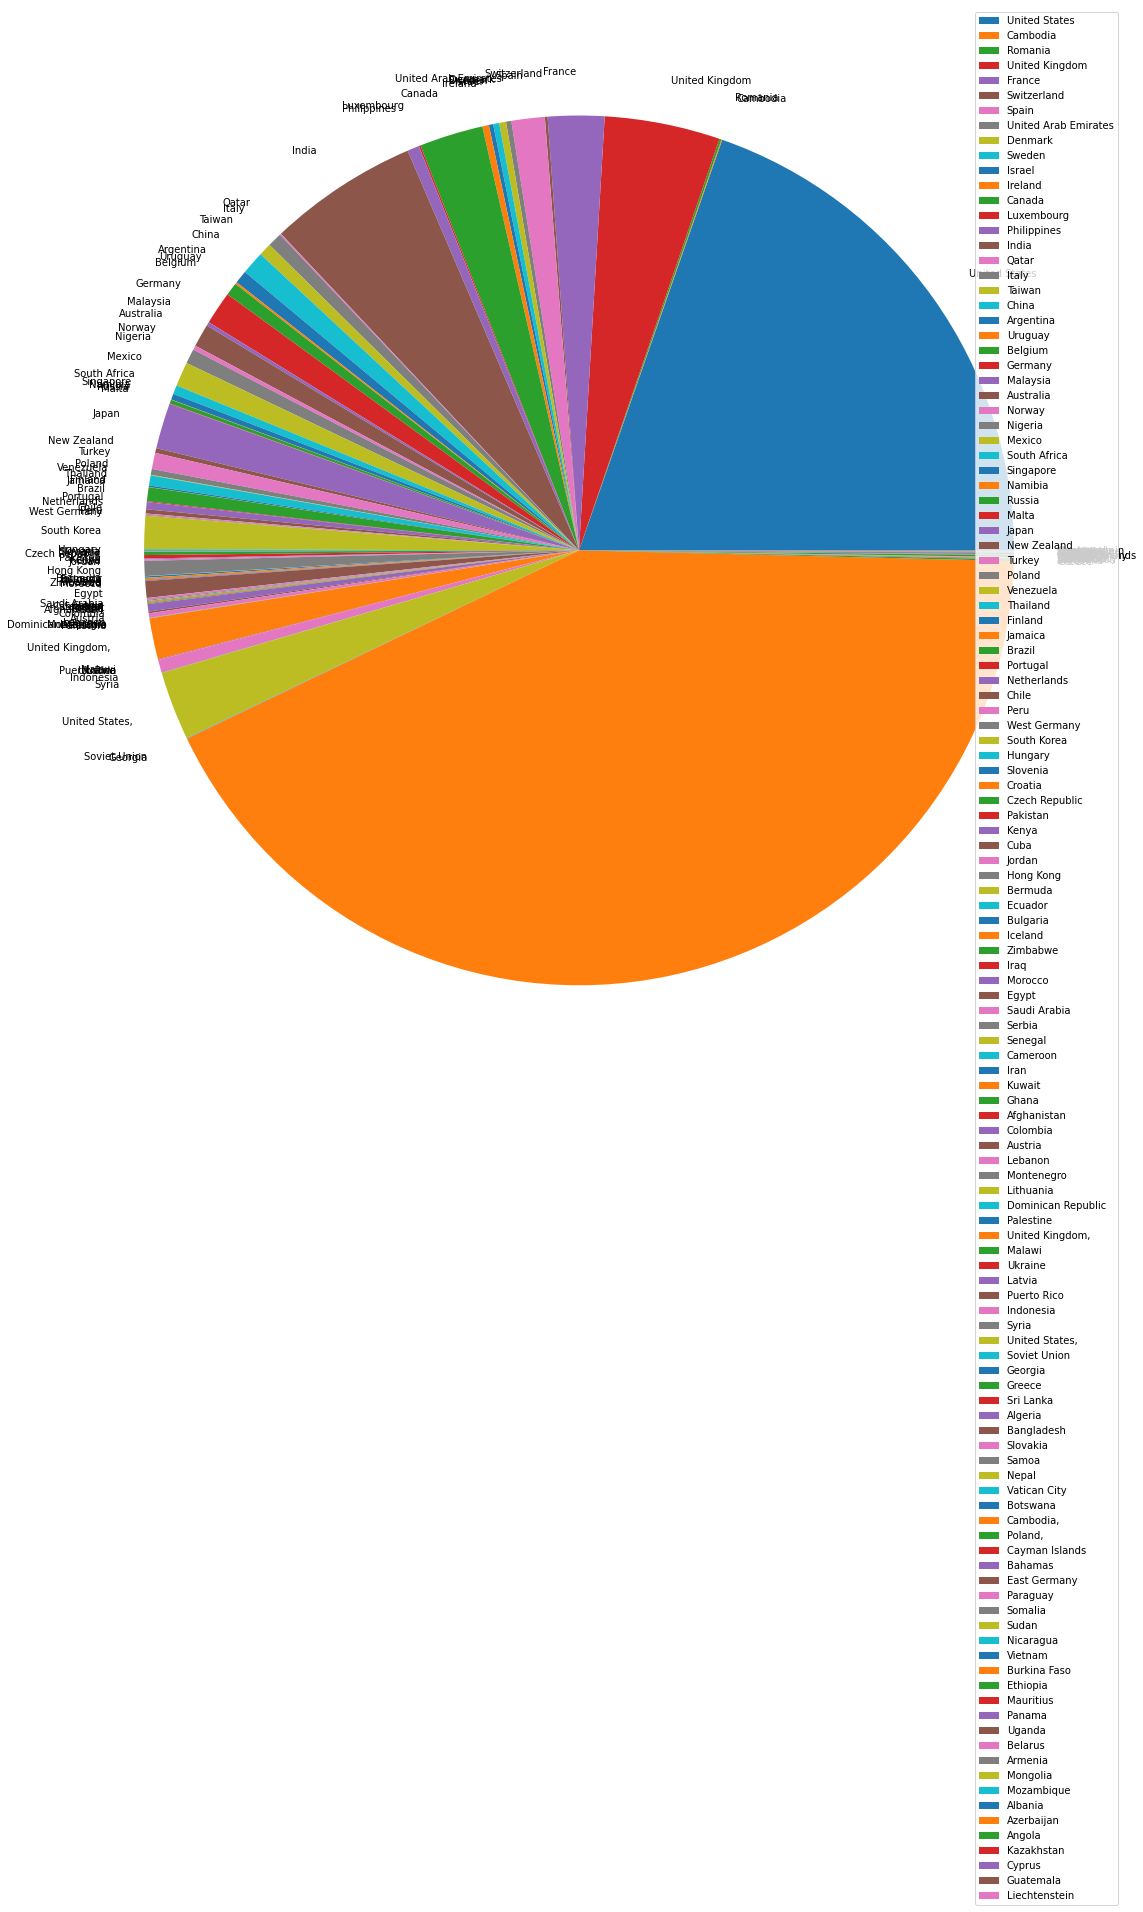

In [135]:
a = list(set(df['country'].unique()))[1:]
di = {}

n = df['country'].dropna().to_list()

for i in a:
  x = i.split(', ')
  for j in x:
    if j not in di.keys():
      di[j] = 0
    
for x in di.keys():
  for y in n:
    if x in y:
      di[x] +=1


plt.figure(figsize=(20,20))
plt.pie(di.values(),labels=di.keys())
plt.legend()
plt.show()
